In [4]:
# !pip install Prophet

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from prophet import Prophet
import matplotlib
import logging
import warnings

In [16]:
plt.style.use('fivethirtyeight')

d2coding_path = 'D2Coding/D2Coding-Ver1.3.2-20180524.ttf' # 폰트 경로
fm.fontManager.addfont(d2coding_path)
plt.rcParams['font.family'] = 'D2Coding'

matplotlib.rcParams['axes.unicode_minus'] = False

#prophet의 INFO Logging 비활성화
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
#prophet의 Future warning 메시지 비활성화
warnings.simplefilter(action='ignore', category=FutureWarning)

In [20]:
file_path = '../dataset/출입국_항구_내외국인_성별_국제이동_연간__20241213140727.csv'
data = pd.read_csv(file_path)

In [21]:
data.tail(10)

,시점,출입국항별,내외국인별,성별,입국자,출국자
174,2022,김해(김해공항),외국인,남자,5854,4833
175,2022,김해(김해공항),외국인,여자,6911,4596
176,2023,인천공항,내국인,남자,97746,113276
177,2023,인천공항,내국인,여자,95233,118599
178,2023,인천공항,외국인,남자,238300,148900
179,2023,인천공항,외국인,여자,181388,130769
180,2023,김해(김해공항),내국인,남자,8884,8976
181,2023,김해(김해공항),내국인,여자,6373,6860
182,2023,김해(김해공항),외국인,남자,18315,12422
183,2023,김해(김해공항),외국인,여자,17574,12343


In [35]:
ex1_data = data.copy()
ex1_data.columns = ['date', 'airport_name', 'nation', 'gender', 'in', 'out']
ex1_data.tail(10)

,date,airport_name,nation,gender,in,out
174,2022,김해(김해공항),외국인,남자,5854,4833
175,2022,김해(김해공항),외국인,여자,6911,4596
176,2023,인천공항,내국인,남자,97746,113276
177,2023,인천공항,내국인,여자,95233,118599
178,2023,인천공항,외국인,남자,238300,148900
179,2023,인천공항,외국인,여자,181388,130769
180,2023,김해(김해공항),내국인,남자,8884,8976
181,2023,김해(김해공항),내국인,여자,6373,6860
182,2023,김해(김해공항),외국인,남자,18315,12422
183,2023,김해(김해공항),외국인,여자,17574,12343


In [43]:
ex1_data['date'] = pd.to_datetime(ex1_data['date'], format='%Y')
ex1_data.tail(10)

,date,airport_name,nation,gender,in,out
174,2022-01-01,김해(김해공항),외국인,남자,5854,4833
175,2022-01-01,김해(김해공항),외국인,여자,6911,4596
176,2023-01-01,인천공항,내국인,남자,97746,113276
177,2023-01-01,인천공항,내국인,여자,95233,118599
178,2023-01-01,인천공항,외국인,남자,238300,148900
179,2023-01-01,인천공항,외국인,여자,181388,130769
180,2023-01-01,김해(김해공항),내국인,남자,8884,8976
181,2023-01-01,김해(김해공항),내국인,여자,6373,6860
182,2023-01-01,김해(김해공항),외국인,남자,18315,12422
183,2023-01-01,김해(김해공항),외국인,여자,17574,12343


In [72]:
ex1_data_fore = ex1_data.copy()
ex1_data_fore = ex1_data_fore[(ex1_data_fore['nation'] == '외국인') & (ex1_data_fore['airport_name'] == '인천공항')]
ex1_data_fore = ex1_data_fore.groupby(['date'], as_index=False)[['in', 'out']].sum() #.reset_index() 대신에 groupby(cols, as_index=False)를 사용
ex1_data_fore

,date,in,out
0,2001-01-01,108662,72896
1,2002-01-01,135099,97493
2,2003-01-01,140375,134088
3,2004-01-01,149826,123698
4,2005-01-01,214051,229675
5,2006-01-01,246453,145644
6,2007-01-01,249330,127230
7,2008-01-01,256440,174604
8,2009-01-01,202894,201288
9,2010-01-01,254870,163777


In [73]:
ex2_data = ex1_data_fore.set_index('date')[['in', 'out']]
ex2_data

,in,out
date,,
2001-01-01,108662,72896
2002-01-01,135099,97493
2003-01-01,140375,134088
2004-01-01,149826,123698
2005-01-01,214051,229675
2006-01-01,246453,145644
2007-01-01,249330,127230
2008-01-01,256440,174604
2009-01-01,202894,201288


<Axes: title={'center': '2001~2023년 인천공항 입출국 외국인 차트'}, xlabel='date'>

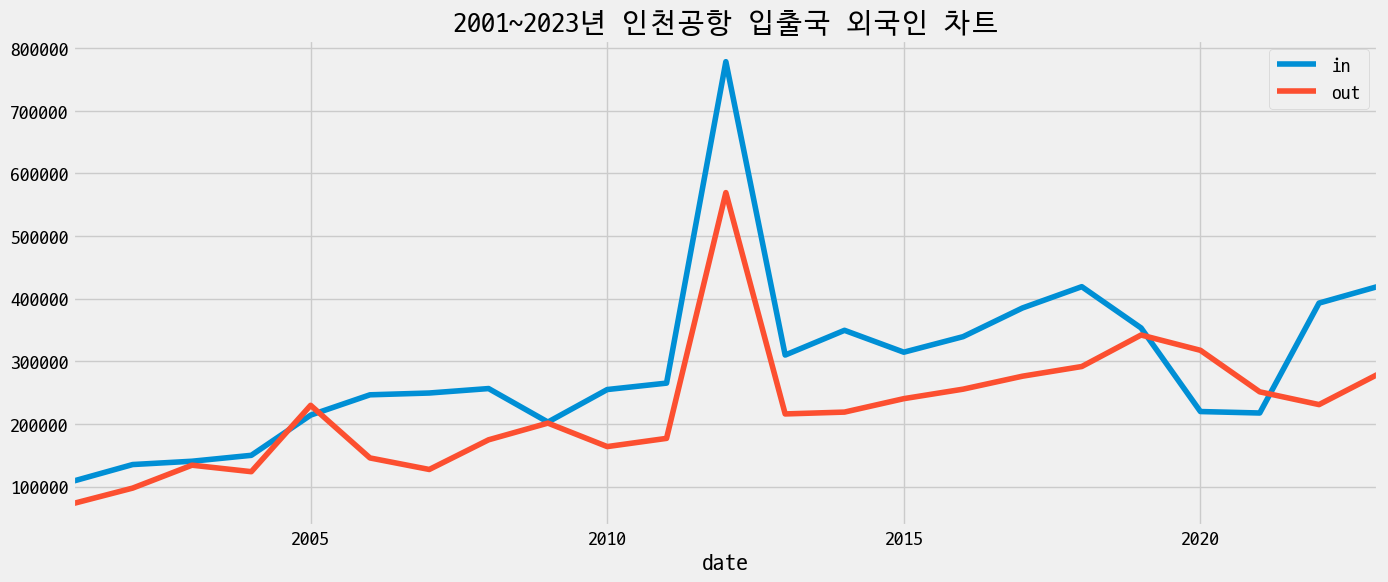

In [74]:
ex2_data.plot(
    figsize=(15, 6),
    title='2001~2023년 인천공항 입출국 외국인 차트'
)

<Axes: title={'center': '2001~2023년 인천공항 입국 외국인 차트'}, xlabel='date'>

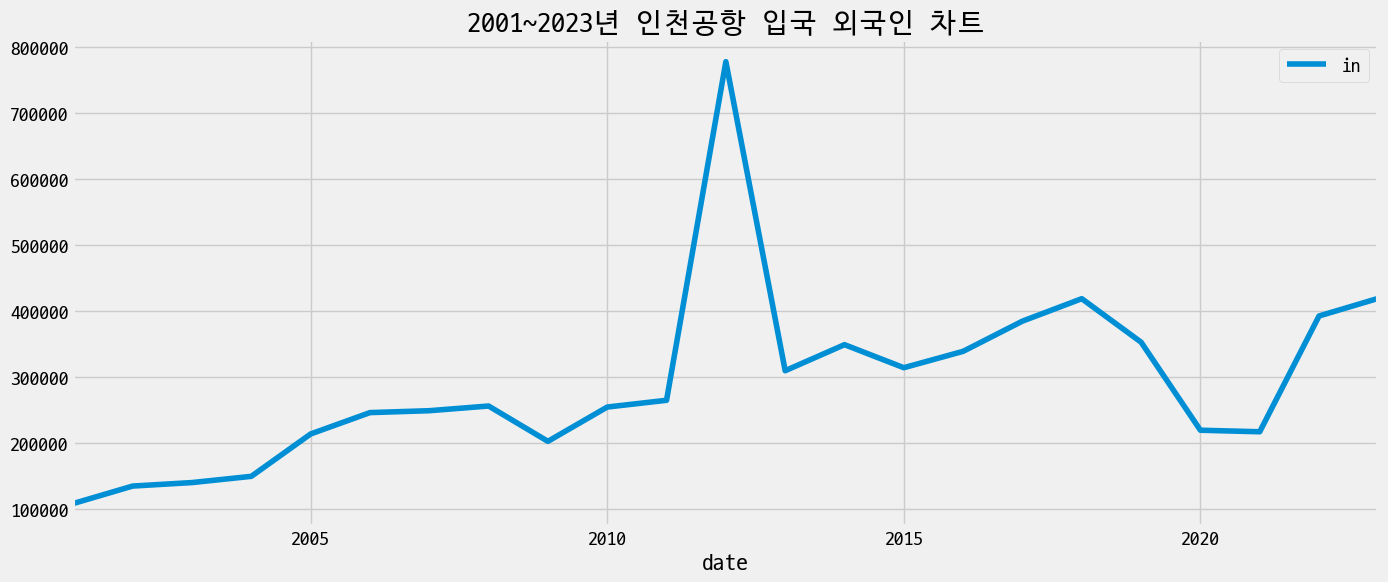

In [75]:
ex2_data_in = ex2_data[['in']]
ex2_data_in.plot(
    figsize=(15, 6),
    title='2001~2023년 인천공항 입국 외국인 차트'
)

<Axes: title={'center': '2001~2023년 인천공항 출국 외국인 차트'}, xlabel='date'>

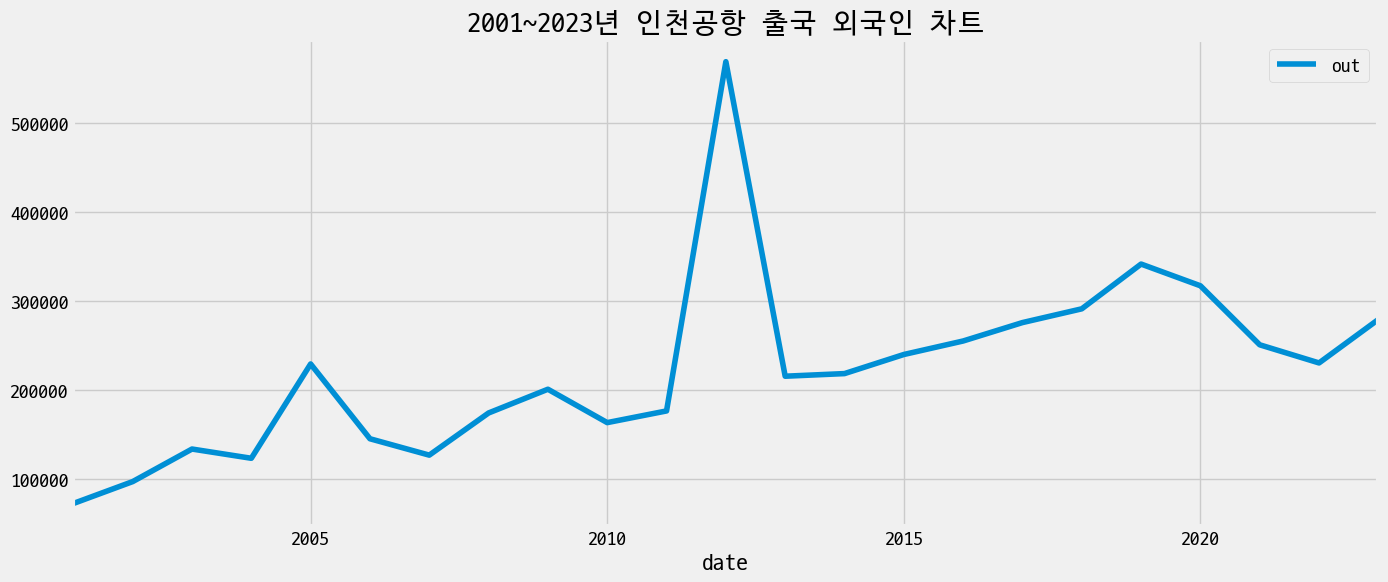

In [76]:
ex2_data_out = ex2_data[['out']]
ex2_data_out.plot(
    figsize=(15, 6),
    title='2001~2023년 인천공항 출국 외국인 차트'
)

In [93]:
ex2_data_all = ex1_data_fore[['date']]
ex2_data_all = ex2_data_all.copy()
ex2_data_all['all'] = ex1_data_fore['in'] + ex1_data_fore['out']
print(ex1_data_fore.head(10))
print(ex2_data_all.head(10))

        date      in     out
0 2001-01-01  108662   72896
1 2002-01-01  135099   97493
2 2003-01-01  140375  134088
3 2004-01-01  149826  123698
4 2005-01-01  214051  229675
5 2006-01-01  246453  145644
6 2007-01-01  249330  127230
7 2008-01-01  256440  174604
8 2009-01-01  202894  201288
9 2010-01-01  254870  163777
        date     all
0 2001-01-01  181558
1 2002-01-01  232592
2 2003-01-01  274463
3 2004-01-01  273524
4 2005-01-01  443726
5 2006-01-01  392097
6 2007-01-01  376560
7 2008-01-01  431044
8 2009-01-01  404182
9 2010-01-01  418647


<Axes: title={'center': '2001~2023년 인천공항 입출국 합계 외국인 차트'}, xlabel='date'>

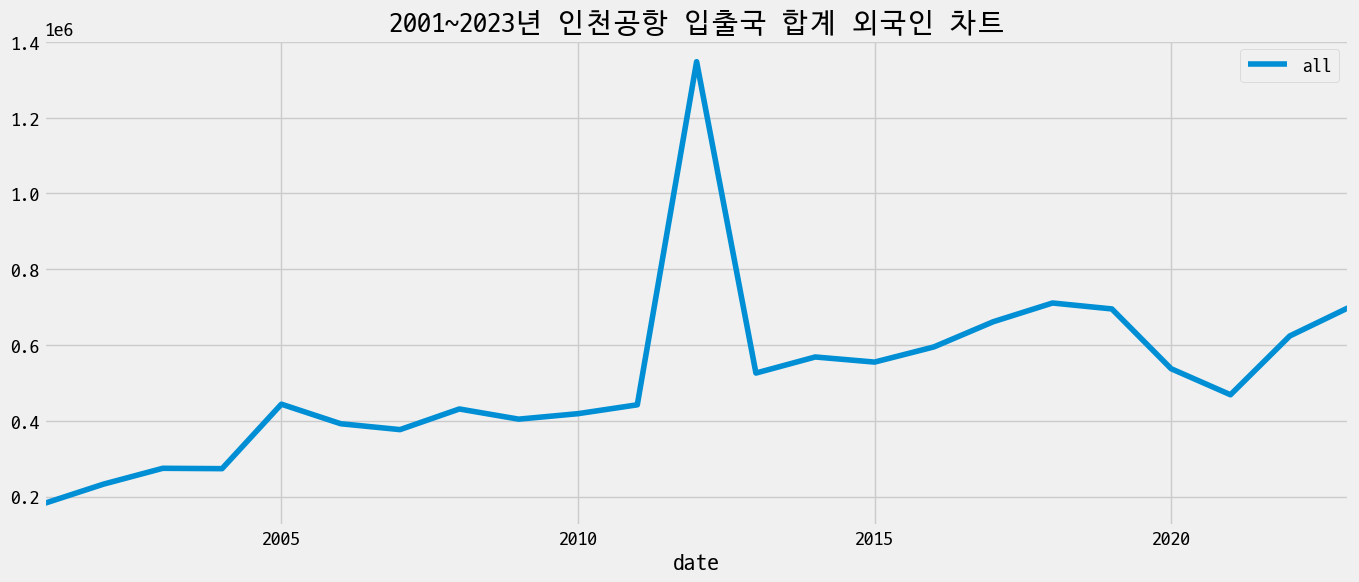

In [94]:
ex2_data_all_plot = ex2_data_all.set_index('date')
ex2_data_all_plot.plot(
    figsize=(15, 6),
    title='2001~2023년 인천공항 입출국 합계 외국인 차트'
)

In [96]:
# 페이스북에서는 date는 ds, value는 y로 사용해야 함. 열이름 수정.
ex3_data = ex2_data_all.copy()
ex3_data = ex3_data.rename(columns={'date':'ds','all':'y'})
ex3_data.head(10)

,ds,y
0,2001-01-01,181558
1,2002-01-01,232592
2,2003-01-01,274463
3,2004-01-01,273524
4,2005-01-01,443726
5,2006-01-01,392097
6,2007-01-01,376560
7,2008-01-01,431044
8,2009-01-01,404182
9,2010-01-01,418647


In [97]:
m = Prophet() # 페이스북 예측모듈
m.fit(ex3_data) # 학습 시키기

16:02:22 - cmdstanpy - INFO - Chain [1] start processing
16:02:24 - cmdstanpy - INFO - Chain [1] done processing


           ds          trend    yhat_lower  ...  multiplicative_terms_lower  multiplicative_terms_upper          yhat
0  2001-01-01  310508.110402  5.387353e+03  ...                         0.0                         0.0  2.370816e+05
1  2002-01-01  329790.049609  6.785373e+04  ...                         0.0                         0.0  2.985879e+05
2  2003-01-01  349071.988807  1.463520e+05  ...                         0.0                         0.0  3.664011e+05
3  2004-01-01  368353.928011  2.009699e+05  ...                         0.0                         0.0  4.404627e+05
4  2005-01-01  387688.694443  8.196346e+04  ...                         0.0                         0.0  3.142622e+05
5  2006-01-01  406970.633636  1.484811e+05  ...                         0.0                         0.0  3.757685e+05
6  2007-01-01  426252.572828  2.319388e+05  ...                         0.0                         0.0  4.435817e+05
7  2008-01-01  445534.512012  2.653866e+05  ...         

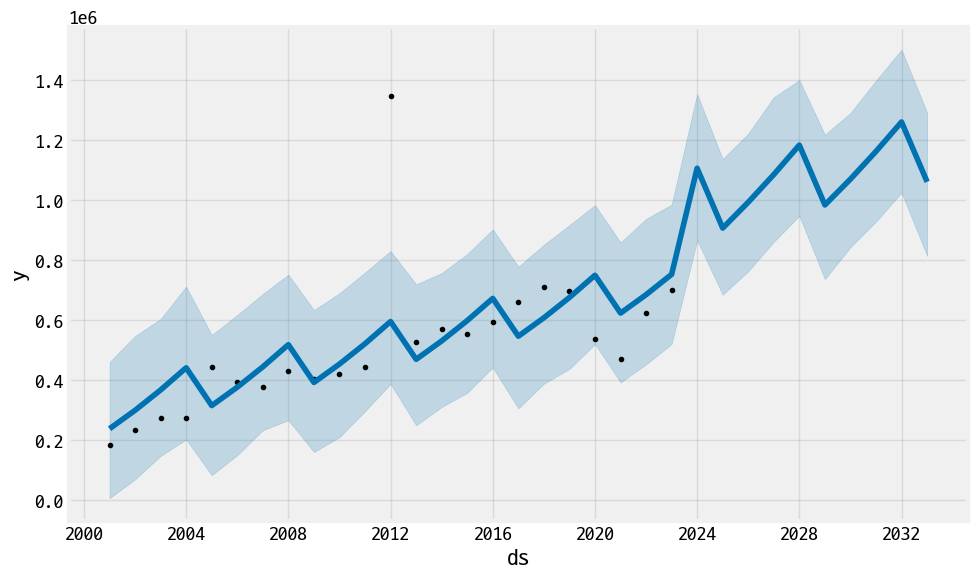

In [102]:
future = m.make_future_dataframe(periods=10, freq='Y')
forecast = m.predict(future)
print(forecast)
fig1 = m.plot(forecast)
plt.show()